# Compare outcomes from differential analysis based on different imputation methods

- load scores based on `10_1_ald_diff_analysis`

In [1]:
import logging
from pathlib import Path

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from IPython.display import display

import pimmslearn
import pimmslearn.databases.diseases

logger = pimmslearn.logging.setup_nb_logger()

plt.rcParams['figure.figsize'] = (2, 2)
fontsize = 5
pimmslearn.plotting.make_large_descriptors(fontsize)
logging.getLogger('fontTools').setLevel(logging.ERROR)

# catch passed parameters
args = None
args = dict(globals()).keys()

## Parameters
Default and set parameters for the notebook.

In [2]:
folder_experiment = 'runs/appl_ald_data/plasma/proteinGroups'

target = 'kleiner'
model_key = 'VAE'
baseline = 'RSN'
out_folder = 'diff_analysis'
selected_statistics = ['p-unc', '-Log10 pvalue', 'qvalue', 'rejected']

disease_ontology = 5082  # code from https://disease-ontology.org/
# split diseases notebook? Query gene names for proteins in file from uniprot?
annotaitons_gene_col = 'PG.Genes'

In [3]:
# Parameters
disease_ontology = 10652
folder_experiment = "runs/alzheimer_study"
target = "AD"
baseline = "PI"
model_key = "QRILC"
out_folder = "diff_analysis"
annotaitons_gene_col = "None"


Add set parameters to configuration

In [4]:
params = pimmslearn.nb.get_params(args, globals=globals())
args = pimmslearn.nb.Config()
args.folder_experiment = Path(params["folder_experiment"])
args = pimmslearn.nb.add_default_paths(args,
                                 out_root=(
                                     args.folder_experiment
                                     / params["out_folder"]
                                     / params["target"]
                                     / f"{params['baseline']}_vs_{params['model_key']}"))
args.update_from_dict(params)
args.scores_folder = scores_folder = (args.folder_experiment
                                      / params["out_folder"]
                                      / params["target"]
                                      / 'scores')
args.freq_features_observed = args.folder_experiment / 'freq_features_observed.csv'
args

root - INFO     Removed from global namespace: folder_experiment


root - INFO     Removed from global namespace: target


root - INFO     Removed from global namespace: model_key


root - INFO     Removed from global namespace: baseline


root - INFO     Removed from global namespace: out_folder


root - INFO     Removed from global namespace: selected_statistics


root - INFO     Removed from global namespace: disease_ontology


root - INFO     Removed from global namespace: annotaitons_gene_col


root - INFO     Already set attribute: folder_experiment has value runs/alzheimer_study


root - INFO     Already set attribute: out_folder has value diff_analysis


{'annotaitons_gene_col': 'None',
 'baseline': 'PI',
 'data': PosixPath('runs/alzheimer_study/data'),
 'disease_ontology': 10652,
 'folder_experiment': PosixPath('runs/alzheimer_study'),
 'freq_features_observed': PosixPath('runs/alzheimer_study/freq_features_observed.csv'),
 'model_key': 'QRILC',
 'out_figures': PosixPath('runs/alzheimer_study/figures'),
 'out_folder': PosixPath('runs/alzheimer_study/diff_analysis/AD/PI_vs_QRILC'),
 'out_metrics': PosixPath('runs/alzheimer_study'),
 'out_models': PosixPath('runs/alzheimer_study'),
 'out_preds': PosixPath('runs/alzheimer_study/preds'),
 'scores_folder': PosixPath('runs/alzheimer_study/diff_analysis/AD/scores'),
 'selected_statistics': ['p-unc', '-Log10 pvalue', 'qvalue', 'rejected'],
 'target': 'AD'}

### Excel file for exports

In [5]:
files_out = dict()
writer_args = dict(float_format='%.3f')

fname = args.out_folder / 'diff_analysis_compare_methods.xlsx'
files_out[fname.name] = fname
writer = pd.ExcelWriter(fname)
logger.info("Writing to excel file: %s", fname)

root - INFO     Writing to excel file: runs/alzheimer_study/diff_analysis/AD/PI_vs_QRILC/diff_analysis_compare_methods.xlsx


## Load scores

### Load baseline model scores
Show all statistics, later use selected statistics

In [6]:
fname = args.scores_folder / f'diff_analysis_scores_{args.baseline}.pkl'
scores_baseline = pd.read_pickle(fname)
scores_baseline

model                                      PI                        \
var                                        SS DF      F p-unc   np2   
protein groups               Source                                   
A0A024QZX5;A0A087X1N8;P35237 AD         1.060  1  1.983 0.161 0.010   
                             age        0.162  1  0.303 0.582 0.002   
                             Kiel       2.144  1  4.013 0.047 0.021   
                             Magdeburg  3.679  1  6.885 0.009 0.035   
                             Sweden     5.992  1 11.213 0.001 0.055   
...                                       ... ..    ...   ...   ...   
S4R3U6                       AD         0.710  1  0.728 0.395 0.004   
                             age        0.729  1  0.747 0.388 0.004   
                             Kiel       0.000  1  0.000 0.989 0.000   
                             Magdeburg  1.073  1  1.101 0.295 0.006   
                             Sweden    22.038  1 22.599 0.000 0.106   

model                                                                 
var                                    -Log10 pvalue qvalue rejected  
protein groups               Source                                   
A0A024QZX5;A0A087X1N8;P35237 AD                0.794  0.296    False  
                             age               0.235  0.720    False  
                             Kiel              1.332  0.115    False  
                             Magdeburg         2.027  0.032     True  
                             Sweden            3.009  0.005     True  
...                                              ...    ...      ...  
S4R3U6                       AD                0.404  0.559    False  
                             age               0.411  0.552    False  
                             Kiel              0.005  0.995    False  
                             Magdeburg         0.529  0.460    False  
                             Sweden            5.407  0.000     True  

[7105 rows x 8 columns]

### Load selected comparison model scores

In [7]:
fname = args.scores_folder / f'diff_analysis_scores_{args.model_key}.pkl'
scores_model = pd.read_pickle(fname)
scores_model

model                                   QRILC                        \
var                                        SS DF      F p-unc   np2   
protein groups               Source                                   
A0A024QZX5;A0A087X1N8;P35237 AD         0.558  1  3.154 0.077 0.016   
                             age        0.013  1  0.072 0.788 0.000   
                             Kiel       0.488  1  2.754 0.099 0.014   
                             Magdeburg  1.211  1  6.839 0.010 0.035   
                             Sweden     2.837  1 16.022 0.000 0.077   
...                                       ... ..    ...   ...   ...   
S4R3U6                       AD         1.095  1  0.548 0.460 0.003   
                             age        1.003  1  0.502 0.479 0.003   
                             Kiel       7.554  1  3.781 0.053 0.019   
                             Magdeburg 19.926  1  9.972 0.002 0.050   
                             Sweden     0.083  1  0.042 0.839 0.000   

model                                                                 
var                                    -Log10 pvalue qvalue rejected  
protein groups               Source                                   
A0A024QZX5;A0A087X1N8;P35237 AD                1.112  0.161    False  
                             age               0.103  0.867    False  
                             Kiel              1.006  0.195    False  
                             Magdeburg         2.016  0.030     True  
                             Sweden            4.048  0.001     True  
...                                              ...    ...      ...  
S4R3U6                       AD                0.337  0.600    False  
                             age               0.319  0.619    False  
                             Kiel              1.273  0.119    False  
                             Magdeburg         2.733  0.008     True  
                             Sweden            0.076  0.901    False  

[7105 rows x 8 columns]

### Combined scores
show only selected statistics for comparsion

In [8]:
scores = scores_model.join(scores_baseline, how='outer')[[args.baseline, args.model_key]]
scores = scores.loc[:, pd.IndexSlice[scores.columns.levels[0].to_list(),
                                     args.selected_statistics]]
scores

model                                     PI                                \
var                                    p-unc -Log10 pvalue qvalue rejected   
protein groups               Source                                          
A0A024QZX5;A0A087X1N8;P35237 AD        0.161         0.794  0.296    False   
                             Kiel      0.047         1.332  0.115    False   
                             Magdeburg 0.009         2.027  0.032     True   
                             Sweden    0.001         3.009  0.005     True   
                             age       0.582         0.235  0.720    False   
...                                      ...           ...    ...      ...   
S4R3U6                       AD        0.395         0.404  0.559    False   
                             Kiel      0.989         0.005  0.995    False   
                             Magdeburg 0.295         0.529  0.460    False   
                             Sweden    0.000         5.407  0.000     True   
                             age       0.388         0.411  0.552    False   

model                                  QRILC                                
var                                    p-unc -Log10 pvalue qvalue rejected  
protein groups               Source                                         
A0A024QZX5;A0A087X1N8;P35237 AD        0.077         1.112  0.161    False  
                             Kiel      0.099         1.006  0.195    False  
                             Magdeburg 0.010         2.016  0.030     True  
                             Sweden    0.000         4.048  0.001     True  
                             age       0.788         0.103  0.867    False  
...                                      ...           ...    ...      ...  
S4R3U6                       AD        0.460         0.337  0.600    False  
                             Kiel      0.053         1.273  0.119    False  
                             Magdeburg 0.002         2.733  0.008     True  
                             Sweden    0.839         0.076  0.901    False  
                             age       0.479         0.319  0.619    False  

[7105 rows x 8 columns]

Models in comparison (name mapping)

In [9]:
models = pimmslearn.nb.Config.from_dict(
    pimmslearn.pandas.index_to_dict(scores.columns.get_level_values(0)))
vars(models)

{'PI': 'PI', 'QRILC': 'QRILC'}

## Describe scores

In [10]:
scores.describe()

model        PI                             QRILC                        
var       p-unc -Log10 pvalue    qvalue     p-unc -Log10 pvalue    qvalue
count 7,105.000     7,105.000 7,105.000 7,105.000     7,105.000 7,105.000
mean      0.262         2.482     0.339     0.246         2.735     0.312
std       0.304         5.326     0.332     0.300         5.159     0.327
min       0.000         0.000     0.000     0.000         0.000     0.000
25%       0.004         0.331     0.015     0.002         0.362     0.008
50%       0.121         0.918     0.242     0.094         1.028     0.188
75%       0.466         2.425     0.622     0.435         2.689     0.580
max       1.000       147.618     1.000     1.000        83.041     1.000

### One to one comparison of by feature:

In [11]:
scores = scores.loc[pd.IndexSlice[:, args.target], :]
scores.to_excel(writer, 'scores', **writer_args)
scores

/tmp/ipykernel_48078/3761369923.py:2: FutureWarning: Starting with pandas version 3.0 all arguments of to_excel except for the argument 'excel_writer' will be keyword-only.
  scores.to_excel(writer, 'scores', **writer_args)


model                                                        PI                \
var                                                       p-unc -Log10 pvalue   
protein groups                                     Source                       
A0A024QZX5;A0A087X1N8;P35237                       AD     0.161         0.794   
A0A024R0T9;K7ER74;P02655                           AD     0.060         1.225   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... AD     0.029         1.539   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            AD     0.569         0.245   
A0A075B6H7                                         AD     0.128         0.894   
...                                                         ...           ...   
Q9Y6R7                                             AD     0.175         0.756   
Q9Y6X5                                             AD     0.042         1.379   
Q9Y6Y8;Q9Y6Y8-2                                    AD     0.083         1.079   
Q9Y6Y9                                             AD     0.753         0.123   
S4R3U6                                             AD     0.395         0.404   

model                                                                      \
var                                                       qvalue rejected   
protein groups                                     Source                   
A0A024QZX5;A0A087X1N8;P35237                       AD      0.296    False   
A0A024R0T9;K7ER74;P02655                           AD      0.139    False   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... AD      0.079    False   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            AD      0.709    False   
A0A075B6H7                                         AD      0.251    False   
...                                                          ...      ...   
Q9Y6R7                                             AD      0.317    False   
Q9Y6X5                                             AD      0.106    False   
Q9Y6Y8;Q9Y6Y8-2                                    AD      0.182    False   
Q9Y6Y9                                             AD      0.848    False   
S4R3U6                                             AD      0.559    False   

model                                                     QRILC                \
var                                                       p-unc -Log10 pvalue   
protein groups                                     Source                       
A0A024QZX5;A0A087X1N8;P35237                       AD     0.077         1.112   
A0A024R0T9;K7ER74;P02655                           AD     0.032         1.491   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... AD     0.252         0.598   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            AD     0.316         0.500   
A0A075B6H7                                         AD     0.201         0.698   
...                                                         ...           ...   
Q9Y6R7                                             AD     0.175         0.756   
Q9Y6X5                                             AD     0.056         1.251   
Q9Y6Y8;Q9Y6Y8-2                                    AD     0.083         1.079   
Q9Y6Y9                                             AD     0.807         0.093   
S4R3U6                                             AD     0.460         0.337   

model                                                                      
var                                                       qvalue rejected  
protein groups                                     Source                  
A0A024QZX5;A0A087X1N8;P35237                       AD      0.161    False  
A0A024R0T9;K7ER74;P02655                           AD      0.080    False  
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... AD      0.397    False  
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            AD      0.465    False  
A0A075B6H7                                         AD      0.335    False  
...                                        

And the descriptive statistics
of the numeric values:

In [12]:
scores.describe()

model        PI                             QRILC                        
var       p-unc -Log10 pvalue    qvalue     p-unc -Log10 pvalue    qvalue
count 1,421.000     1,421.000 1,421.000 1,421.000     1,421.000 1,421.000
mean      0.255         1.417     0.337     0.250         1.490     0.322
std       0.291         1.686     0.318     0.293         1.768     0.318
min       0.000         0.000     0.000     0.000         0.000     0.000
25%       0.011         0.364     0.035     0.009         0.364     0.029
50%       0.123         0.909     0.245     0.109         0.962     0.211
75%       0.433         1.972     0.591     0.432         2.025     0.577
max       0.999        26.974     0.999     1.000        23.689     1.000

and the boolean decision values

In [13]:
scores.describe(include=['bool', 'O'])

model,PI,QRILC
var,rejected,rejected
count,1421,1421
unique,2,2
top,False,False
freq,1021,988


## Load frequencies of observed features

In [14]:
freq_feat = pd.read_csv(args.freq_features_observed, index_col=0)
freq_feat.columns = pd.MultiIndex.from_tuples([('data', 'frequency'),])
freq_feat

,data
,frequency
protein groups,
A0A024QZX5;A0A087X1N8;P35237,186
A0A024R0T9;K7ER74;P02655,195
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;O60462-4;O60462-5;Q7LBX6;X5D2Q8,174
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503,196
A0A075B6H7,91
...,...
Q9Y6R7,197
Q9Y6X5,173


## Compare shared features

In [15]:
scores_common = (scores
                 .dropna()
                 .reset_index(-1, drop=True)
                 ).join(
    freq_feat, how='left'
)
scores_common

PI                       \
                                                   p-unc -Log10 pvalue qvalue   
protein groups                                                                  
A0A024QZX5;A0A087X1N8;P35237                       0.161         0.794  0.296   
A0A024R0T9;K7ER74;P02655                           0.060         1.225  0.139   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... 0.029         1.539  0.079   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            0.569         0.245  0.709   
A0A075B6H7                                         0.128         0.894  0.251   
...                                                  ...           ...    ...   
Q9Y6R7                                             0.175         0.756  0.317   
Q9Y6X5                                             0.042         1.379  0.106   
Q9Y6Y8;Q9Y6Y8-2                                    0.083         1.079  0.182   
Q9Y6Y9                                             0.753         0.123  0.848   
S4R3U6                                             0.395         0.404  0.559   

                                                            QRILC  \
                                                   rejected p-unc   
protein groups                                                      
A0A024QZX5;A0A087X1N8;P35237                          False 0.077   
A0A024R0T9;K7ER74;P02655                              False 0.032   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;...    False 0.252   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503               False 0.316   
A0A075B6H7                                            False 0.201   
...                                                     ...   ...   
Q9Y6R7                                                False 0.175   
Q9Y6X5                                                False 0.056   
Q9Y6Y8;Q9Y6Y8-2                                       False 0.083   
Q9Y6Y9                                                False 0.807   
S4R3U6                                                False 0.460   

                                                                         \
                                                   -Log10 pvalue qvalue   
protein groups                                                            
A0A024QZX5;A0A087X1N8;P35237                               1.112  0.161   
A0A024R0T9;K7ER74;P02655                                   1.491  0.080   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;...         0.598  0.397   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503                    0.500  0.465   
A0A075B6H7                                                 0.698  0.335   
...                                                          ...    ...   
Q9Y6R7                                                     0.756  0.302   
Q9Y6X5                                                     1.251  0.124   
Q9Y6Y8;Q9Y6Y8-2                                            1.079  0.171   
Q9Y6Y9                                                     0.093  0.881   
S4R3U6                                                     0.337  0.600   

                                                                 data  
                                                   rejected frequency  
protein groups                                                         
A0A024QZX5;A0A087X1N8;P35237                          False       186  
A0A024R0T9;K7ER74;P02655                              False       195  
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;...    False       174  
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503               False       196  
A0A075B6H7                                            False        91  
...                                                     ...       ...  
Q9Y6R7                                                False       197  
Q9Y6X5                                                False       173  
Q9Y6Y8;Q9Y6Y8-2                                       False       197  
Q9Y6Y9                               

### Annotate decisions in Confusion Table style:

In [16]:
def annotate_decision(scores, model, model_column):
    return scores[(model_column, 'rejected')].replace({False: f'{model} (no) ', True: f'{model} (yes)'})


annotations = None
for model, model_column in models.items():
    if annotations is not None:
        annotations += ' - '
        annotations += annotate_decision(scores_common,
                                         model=model, model_column=model_column)
    else:
        annotations = annotate_decision(
            scores_common, model=model, model_column=model_column)
annotations.name = 'Differential Analysis Comparison'
annotations.value_counts()

Differential Analysis Comparison
PI (no)  - QRILC (no)    958
PI (yes) - QRILC (yes)   370
PI (no)  - QRILC (yes)    63
PI (yes) - QRILC (no)     30
Name: count, dtype: int64

### List different decisions between models

In [17]:
mask_different = (
    (scores_common.loc[:, pd.IndexSlice[:, 'rejected']].any(axis=1))
    & ~(scores_common.loc[:, pd.IndexSlice[:, 'rejected']].all(axis=1))
)
_to_write = scores_common.loc[mask_different]
_to_write.to_excel(writer, 'differences', **writer_args)
logger.info("Writen to Excel file under sheet 'differences'.")
_to_write

/tmp/ipykernel_48078/1417621106.py:6: FutureWarning: Starting with pandas version 3.0 all arguments of to_excel except for the argument 'excel_writer' will be keyword-only.
  _to_write.to_excel(writer, 'differences', **writer_args)
root - INFO     Writen to Excel file under sheet 'differences'.


PI                                \
                                         p-unc -Log10 pvalue qvalue rejected   
protein groups                                                                 
A0A075B6I0                               0.021         1.673  0.062    False   
A0A075B6J9                               0.013         1.885  0.041     True   
A0A087WTT8;A0A0A0MQX5;O94779;O94779-2    0.010         2.018  0.032     True   
A0A087WWT2;Q9NPD7                        0.018         1.738  0.054    False   
A0A087X152;D6RE16;E0CX15;O95185;O95185-2 0.012         1.910  0.040     True   
...                                        ...           ...    ...      ...   
Q9NZ94;Q9NZ94-2;Q9NZ94-3                 0.477         0.321  0.632    False   
Q9NZU1                                   0.011         1.972  0.035     True   
Q9P0K9                                   0.025         1.595  0.072    False   
Q9UNW1                                   0.010         1.979  0.035     True   
Q9UQ52                                   0.113         0.949  0.229    False   

                                         QRILC                                \
                                         p-unc -Log10 pvalue qvalue rejected   
protein groups                                                                 
A0A075B6I0                               0.002         2.712  0.008     True   
A0A075B6J9                               0.094         1.028  0.187    False   
A0A087WTT8;A0A0A0MQX5;O94779;O94779-2    0.166         0.781  0.289    False   
A0A087WWT2;Q9NPD7                        0.005         2.297  0.017     True   
A0A087X152;D6RE16;E0CX15;O95185;O95185-2 0.097         1.014  0.192    False   
...                                        ...           ...    ...      ...   
Q9NZ94;Q9NZ94-2;Q9NZ94-3                 0.013         1.876  0.039     True   
Q9NZU1                                   0.208         0.683  0.344    False   
Q9P0K9                                   0.015         1.830  0.042     True   
Q9UNW1                                   0.101         0.997  0.198    False   
Q9UQ52                                   0.005         2.323  0.017     True   

                                              data  
                                         frequency  
protein groups                                      
A0A075B6I0                                     194  
A0A075B6J9                                     156  
A0A087WTT8;A0A0A0MQX5;O94779;O94779-2          114  
A0A087WWT2;Q9NPD7                              193  
A0A087X152;D6RE16;E0CX15;O95185;O95185-2       176  
...                                            ...  
Q9NZ94;Q9NZ94-2;Q9NZ94-3                       115  
Q9NZU1                                          72  
Q9P0K9                                         192  
Q9UNW1                                         171  
Q9UQ52                                         188  

[93 rows x 9 columns]

## Plot qvalues of both models with annotated decisions

Prepare data for plotting (qvalues)

In [18]:
var = 'qvalue'
to_plot = [scores_common[v][var] for v in models.values()]
for s, k in zip(to_plot, models.keys()):
    s.name = k.replace('_', ' ')
to_plot.append(scores_common['data'])
to_plot.append(annotations)
to_plot = pd.concat(to_plot, axis=1)
to_plot

,PI,QRILC,frequency,Differential Analysis Comparison
protein groups,,,,
A0A024QZX5;A0A087X1N8;P35237,0.296,0.161,186,PI (no) - QRILC (no)
A0A024R0T9;K7ER74;P02655,0.139,0.080,195,PI (no) - QRILC (no)
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;O60462-4;O60462-5;Q7LBX6;X5D2Q8,0.079,0.397,174,PI (no) - QRILC (no)
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503,0.709,0.465,196,PI (no) - QRILC (no)
A0A075B6H7,0.251,0.335,91,PI (no) - QRILC (no)
...,...,...,...,...
Q9Y6R7,0.317,0.302,197,PI (no) - QRILC (no)
Q9Y6X5,0.106,0.124,173,PI (no) - QRILC (no)
Q9Y6Y8;Q9Y6Y8-2,0.182,0.171,197,PI (no) - QRILC (no)


List of features with the highest difference in qvalues

In [19]:
# should it be possible to run not only RSN?
to_plot['diff_qvalue'] = (to_plot[str(args.baseline)] - to_plot[str(args.model_key)]).abs()
to_plot.loc[mask_different].sort_values('diff_qvalue', ascending=False)

,PI,QRILC,frequency,Differential Analysis Comparison,diff_qvalue
protein groups,,,,,
E7EN89;E9PP67;E9PQ25;F2Z2Y8;Q9H0E2;Q9H0E2-2,0.923,0.013,86,PI (no) - QRILC (yes),0.910
O95881,0.791,0.020,67,PI (no) - QRILC (yes),0.770
Q9NPC4,0.656,0.021,173,PI (no) - QRILC (yes),0.635
Q9NZ94;Q9NZ94-2;Q9NZ94-3,0.632,0.039,115,PI (no) - QRILC (yes),0.594
O15041;O15041-2,0.612,0.040,147,PI (no) - QRILC (yes),0.572
...,...,...,...,...,...
P02741,0.051,0.036,182,PI (no) - QRILC (yes),0.015
F2Z2C8;Q9BVH7,0.055,0.044,93,PI (no) - QRILC (yes),0.011
Q15768,0.051,0.040,120,PI (no) - QRILC (yes),0.010


### Differences plotted with created annotations

pimmslearn.plotting - INFO     Saved Figures to runs/alzheimer_study/diff_analysis/AD/PI_vs_QRILC/diff_analysis_comparision_1_QRILC


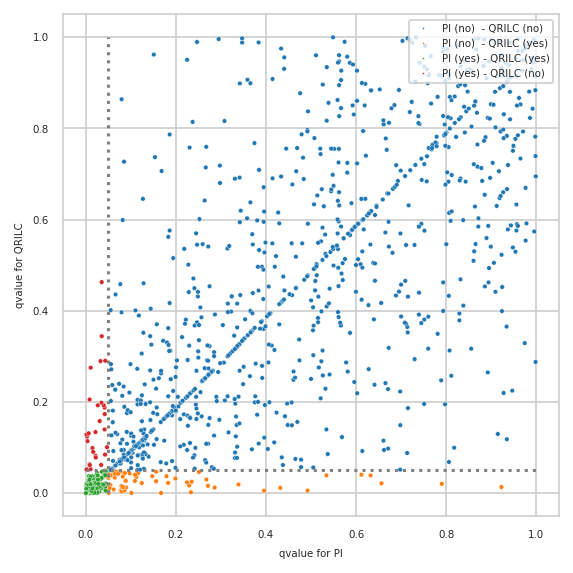

In [20]:
figsize = (4, 4)
size = 5
fig, ax = plt.subplots(figsize=figsize)
x_col = to_plot.columns[0]
y_col = to_plot.columns[1]
ax = sns.scatterplot(data=to_plot,
                     x=x_col,
                     y=y_col,
                     s=size,
                     hue='Differential Analysis Comparison',
                     ax=ax)
_ = ax.legend(fontsize=fontsize,
              title_fontsize=fontsize,
              markerscale=0.4,
              title='',
              )
ax.set_xlabel(f"qvalue for {x_col}")
ax.set_ylabel(f"qvalue for {y_col}")
ax.hlines(0.05, 0, 1, color='grey', linestyles='dotted')
ax.vlines(0.05, 0, 1, color='grey', linestyles='dotted')
sns.move_legend(ax, "upper right")
files_out[f'diff_analysis_comparision_1_{args.model_key}'] = (
    args.out_folder /
    f'diff_analysis_comparision_1_{args.model_key}')
fname = files_out[f'diff_analysis_comparision_1_{args.model_key}']
pimmslearn.savefig(fig, name=fname)

- also showing how many features were measured ("observed") by size of circle

pimmslearn.plotting - INFO     Saved Figures to runs/alzheimer_study/diff_analysis/AD/PI_vs_QRILC/diff_analysis_comparision_2_QRILC


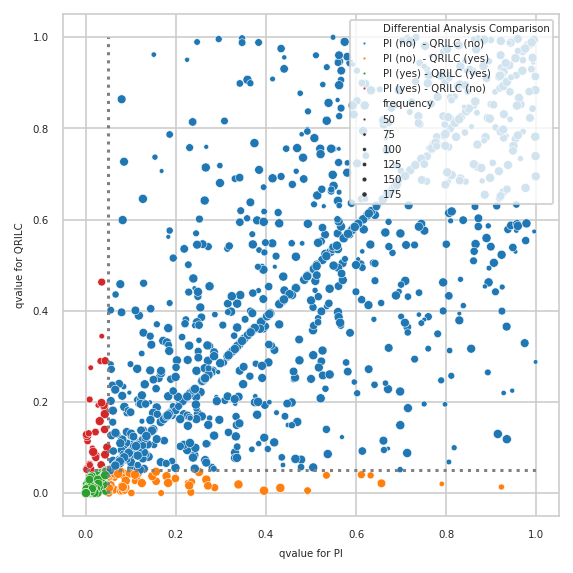

In [21]:
fig, ax = plt.subplots(figsize=figsize)
ax = sns.scatterplot(data=to_plot,
                     x=to_plot.columns[0],
                     y=to_plot.columns[1],
                     size='frequency',
                     s=size,
                     sizes=(5, 20),
                     hue='Differential Analysis Comparison')
_ = ax.legend(fontsize=fontsize,
              title_fontsize=fontsize,
              markerscale=0.6,
              title='',
              )
ax.set_xlabel(f"qvalue for {x_col}")
ax.set_ylabel(f"qvalue for {y_col}")
ax.hlines(0.05, 0, 1, color='grey', linestyles='dotted')
ax.vlines(0.05, 0, 1, color='grey', linestyles='dotted')
sns.move_legend(ax, "upper right")
files_out[f'diff_analysis_comparision_2_{args.model_key}'] = (
    args.out_folder / f'diff_analysis_comparision_2_{args.model_key}')
pimmslearn.savefig(
    fig, name=files_out[f'diff_analysis_comparision_2_{args.model_key}'])

## Only features contained in model
- this block exist due to a specific part in the ALD analysis of the paper

In [22]:
scores_model_only = scores.reset_index(level=-1, drop=True)
_diff = scores_model_only.index.difference(scores_common.index)
if not _diff.empty:
    scores_model_only = (scores_model_only
                         .loc[
                             _diff,
                             args.model_key]
                         .sort_values(by='qvalue', ascending=True)
                         .join(freq_feat.squeeze().rename(freq_feat.columns.droplevel()[0])
                               )
                         )
    display(scores_model_only)
else:
    scores_model_only = None
    logger.info("No features only in new comparision model.")

if not _diff.empty:
    scores_model_only.to_excel(writer, 'only_model', **writer_args)
    display(scores_model_only.rejected.value_counts())
    scores_model_only_rejected = scores_model_only.loc[scores_model_only.rejected]
    scores_model_only_rejected.to_excel(
        writer, 'only_model_rejected', **writer_args)

root - INFO     No features only in new comparision model.


## DISEASES DB lookup

Query diseases database for gene associations with specified disease ontology id.

In [23]:
data = pimmslearn.databases.diseases.get_disease_association(
    doid=args.disease_ontology, limit=10000)
data = pd.DataFrame.from_dict(data, orient='index').rename_axis('ENSP', axis=0)
data = data.rename(columns={'name': args.annotaitons_gene_col}).reset_index(
).set_index(args.annotaitons_gene_col)
data

pimmslearn.databases.diseases - WARNING  There are more associations available


,ENSP,score
None,,
APOE,ENSP00000252486,5.000
PSEN1,ENSP00000326366,5.000
APP,ENSP00000284981,5.000
PSEN2,ENSP00000355747,5.000
MAPT,ENSP00000340820,4.800
...,...,...
PPP1R13B,ENSP00000202556,0.682
AP1M2,ENSP00000465685,0.682
CRISPLD2,ENSP00000262424,0.681


## Shared features
ToDo: new script -> DISEASES DB lookup

In [24]:
feat_name = scores.index.names[0]  # first index level is feature name
if args.annotaitons_gene_col in scores.index.names:
    logger.info(f"Found gene annotation in scores index:  {scores.index.names}")
else:
    logger.info(f"No gene annotation in scores index:  {scores.index.names}"
                " Exiting.")
    import sys
    sys.exit(0)

root - INFO     No gene annotation in scores index:  ['protein groups', 'Source'] Exiting.


SystemExit: 0

/home/runner/work/pimms/pimms/project/.snakemake/conda/6192e93206804e092b1c71b91535a817_/lib/python3.12/site-packages/IPython/core/interactiveshell.py:3585: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [ ]:
gene_to_PG = (scores.droplevel(
    list(set(scores.index.names) - {feat_name, args.annotaitons_gene_col})
)
    .index
    .to_frame()
    .reset_index(drop=True)
    .set_index(args.annotaitons_gene_col)
)
gene_to_PG.head()

In [ ]:
disease_associations_all = data.join(
    gene_to_PG).dropna().reset_index().set_index(feat_name).join(annotations)
disease_associations_all

## only by model

In [ ]:
idx = disease_associations_all.index.intersection(scores_model_only.index)
disease_assocications_new = disease_associations_all.loc[idx].sort_values(
    'score', ascending=False)
disease_assocications_new.head(20)

In [ ]:
mask = disease_assocications_new.loc[idx, 'score'] >= 2.0
disease_assocications_new.loc[idx].loc[mask]

## Only by model which were significant

In [ ]:
idx = disease_associations_all.index.intersection(
    scores_model_only_rejected.index)
disease_assocications_new_rejected = disease_associations_all.loc[idx].sort_values(
    'score', ascending=False)
disease_assocications_new_rejected.head(20)

In [ ]:
mask = disease_assocications_new_rejected.loc[idx, 'score'] >= 2.0
disease_assocications_new_rejected.loc[idx].loc[mask]

## Shared which are only significant for by model

In [ ]:
mask = (scores_common[(str(args.model_key), 'rejected')] & mask_different)
mask.sum()

In [ ]:
idx = disease_associations_all.index.intersection(mask.index[mask])
disease_assocications_shared_rejected_by_model = (disease_associations_all.loc[idx].sort_values(
    'score', ascending=False))
disease_assocications_shared_rejected_by_model.head(20)

In [ ]:
mask = disease_assocications_shared_rejected_by_model.loc[idx, 'score'] >= 2.0
disease_assocications_shared_rejected_by_model.loc[idx].loc[mask]

## Only significant by RSN

In [ ]:
mask = (scores_common[(str(args.baseline), 'rejected')] & mask_different)
mask.sum()

In [ ]:
idx = disease_associations_all.index.intersection(mask.index[mask])
disease_assocications_shared_rejected_by_RSN = (
    disease_associations_all
    .loc[idx]
    .sort_values('score', ascending=False))
disease_assocications_shared_rejected_by_RSN.head(20)

In [ ]:
mask = disease_assocications_shared_rejected_by_RSN.loc[idx, 'score'] >= 2.0
disease_assocications_shared_rejected_by_RSN.loc[idx].loc[mask]

## Write to excel

In [ ]:
disease_associations_all.to_excel(
    writer, sheet_name='disease_assoc_all', **writer_args)
disease_assocications_new.to_excel(
    writer, sheet_name='disease_assoc_new', **writer_args)
disease_assocications_new_rejected.to_excel(
    writer, sheet_name='disease_assoc_new_rejected', **writer_args)

## Outputs

In [ ]:
writer.close()
files_out